# Elliptic Partial Differential Equations

## Poisson Equation

Here we solve the Poisson equation

$$
\nabla^2 \phi(x,y) = \rho(x,y)
$$

by using finite difference methods.

## Relaxation Methods

The first method we are going to use is very simple to implement and it is called relaxation method. The idea is to convert the Poisson equation inot a 2D diffusion equation with a source term:

$$
\frac{\partial \phi(t,x,y)}{\partial t} = \nabla^2 \phi(t,x,y) - \rho(x,y)
$$

and evolve $\phi$ until the error $\xi \equiv |\nabla^2 \phi(t,x,y) - \rho(x,y)|$ is below a certain threshold. One has to pay attention to chose initial data $\phi(t=0,x,y)$ as close as possible to the exact solution (in general this is not known of course, so one has to use some intuition) in order to converge ("relax") in a small number of step to the desired solution.

Since we have 2 spatial dimensions,  we will use the following notation:
$$
\phi^n_{i,j} \equiv \phi(t^n,x_i,y_j) 
$$

We solve this diffusion equation using the FTCS method which is stable for the 2D diffusion equation as long as $\Delta t \leq \frac{\Delta x \Delta y}{(4 D)}$, where in our case the diffusion coefficient $D$ is $1$.

We will also assume for simplicity that $\Delta x = \Delta y = h$. The FTCS scheme in this case can be derived in the following way (remember that we approximate the time derivative at first order and the spatial derivative at second order):

$$
\frac{\partial \phi(t,x,y)}{\partial t} = \nabla^2 \phi(t,x,y) - \rho(x,y) \\
%
\frac{\partial \phi(t,x,y)}{\partial t} = \frac{\partial^2 \phi(t,x,y)}{\partial x^2} + \frac{\partial^2 \phi(t,x,y)}{\partial y^2} - \rho(x,y) \\
%
\frac{\phi^{n+1}_{i,j}-\phi^n_{i,j}}{\Delta t} = \frac{\phi^n_{i+1,j} - 2 \phi^n_{i,j} + \phi^n_{i-1,j}}{\Delta x^2} + \frac{\phi^n_{i,j+1} - 2 \phi^n_{i,j} + \phi^n_{i,j-1}}{\Delta y^2} - \rho_{i,j} \\
%
\phi^{n+1}_{i,j} = \phi^n_{i,j} + \frac{\Delta t}{h^2} \left(\phi^n_{i+1,j} + \phi^n_{i-1,j} + \phi^n_{i,j+1} + \phi^n_{i,j-1} - 4 \phi^n_{i,j} \right) - \rho_{i,j} \Delta t
$$


At each time step the error will simply be given by:
$$
\xi^n_{i,j} = \frac{\phi^n_{i+1,j} + \phi^n_{i-1,j} + \phi^n_{i,j+1} + \phi^n_{i,j-1} - 4 \phi^n_{i,j}}{h^2} - \rho_{i,j}
$$

Let's use this method to solve the following elliptic equation:

$$
\nabla^2 \phi = -5 \sin(x+2y)
$$

This equation has an analytic solution with which we can compare our result:

$$
\phi_A = \sin(x+2y)
$$

We will use as initial data $\phi(t=0,x,y)=1$ and use the analytic solution for our boundary conditions. The domain is set to be $x \in [0,\pi]$ and $y \in [0,\pi]$.

We will also set $\Delta t = h^2/4$ and evolve until $\max(|\xi^n_{i,j}|) \leq 10^{-3}$.

In [15]:
import numpy as np

# Define the domain
L = np.pi       # Domain length
nx = 32         # Number of grid points
dx = L/(nx-1)   # Grid spacing
x = np.linspace(0, L, nx)
y = np.linspace(0, L, nx)

# Create 2D coordinate grid
X, Y = np.meshgrid(x, y, indexing='ij')

# Define the time step
dt = dx**2/4   #Time step

print('nx=',nx)
print('dx=',f"{dx:.2e}")
print('dt=',f"{dt:.2e}")

#analytic solution
exact = np.sin(X+2*Y)
# exact[i, j] corresponds to exact(x[i], y[j]) because we set indexing='ij' in np.meshgrid

#source term rho_ij
rho = -5*np.sin(X+2*Y)

# Define the initial condition
u_initial = np.ones(exact.shape)

# Initialize the solution array
u_current = u_initial.copy()

#boundary conditions
u_current[0,:] = exact[0,:]
u_current[:,0] = exact[:,0]
u_current[-1,:] = exact[-1,:]
u_current[:,-1] = exact[:,-1]

error = ( (np.roll(u_current, 1, axis=0) + np.roll(u_current, -1, axis=0) + np.roll(u_current, 1, axis=1)
           + np.roll(u_current, -1, axis=1) - 4*u_current )/dx**2 - rho )
error[:,0] = 0 #boundary conditions
error[0,:] = 0 #boundary conditions
error[:,-1] = 0 #boundary conditions
error[-1,:] = 0 #boundary conditions


#we create arrays where we will store the iteration and the maxoimu value of the error
error_max=[]
error_max.append(np.max(np.abs(error)))

print('error_max=', f"{error_max[-1]:.2e}")

iteration=[]
iteration.append(0)

print('iteration=', iteration)

nx= 32
dx= 1.01e-01
dt= 2.57e-03
error_max= 2.05e+02
iteration= [0]


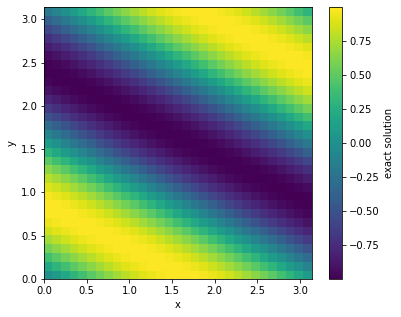

In [16]:
import matplotlib.pyplot as plt

#plot the the analytic solution
plt.figure(figsize=(6, 5))
plt.pcolormesh(X, Y, exact, shading='auto', cmap='viridis')  # or 'jet', 'plasma', etc.
plt.colorbar(label='exact solution')
plt.xlabel('x')
plt.ylabel('y')
plt.show()

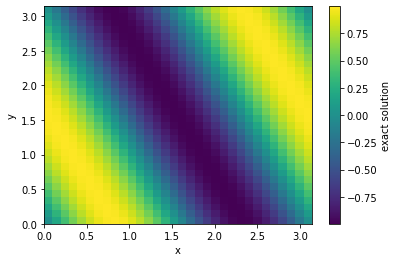

In [20]:
plt.imshow(exact, extent=[x.min(), x.max(), y.min(), y.max()],
           origin='lower', aspect='auto', cmap='viridis')
plt.colorbar(label='exact solution')
plt.xlabel('x')
plt.ylabel('y')
plt.show()

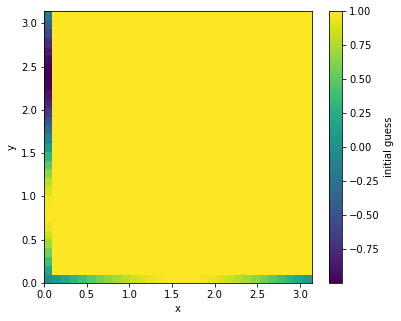

In [19]:
#plot the the initial guess
plt.figure(figsize=(6, 5))
plt.pcolormesh(X, Y, u_current, shading='none', cmap='viridis')  # or 'jet', 'plasma', etc.
plt.colorbar(label='initial guess')
plt.xlabel('x')
plt.ylabel('y')
plt.show()

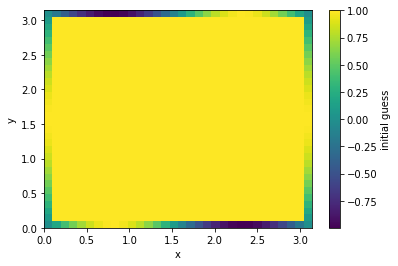

In [18]:
plt.imshow(u_current, extent=[x.min(), x.max(), y.min(), y.max()],
           origin='lower', aspect='auto', cmap='viridis')
plt.colorbar(label='initial guess')
plt.xlabel('x')
plt.ylabel('y')
plt.show()

In [ ]:
import os
##create directory where to save images
print(os.getcwd())

os.makedirs('./images_elliptic')

os.listdir('./')

In [ ]:
# Initilize time and iteration counter
i = 0

#save the initial conditions
plt.plot(x, u_current)
plt.title('Time='+str(round(t,2)))
plt.ylim(0,1.1)
plt.savefig('./images_elliptic/fig_'+str(i).zfill(5)+'.png', dpi=200)
plt.close()

#solve the advection equation
while t < t_final:
    # Compute the new solution using the FTCS method
    # Note: np.roll(u_current, -1) is equivalent to u(j+1) and
    #       np.roll(u_current,  1) is equivalent to u(j-1)
    # using np.roll is equivalent to use periodic boundary conditions
    u_next = u_current + (dt/(dx**2)* (np.roll(u_current, 1, axis=0) + np.roll(u_current, -1, axis=0) + 
                                       np.roll(u_current, 1, axis=1) + np.roll(u_current, -1, axis=1) - 4*u_current ) -
                          rho*dt)
    #boundary conditions
    u_next[0,:] = exact[0,:]
    u_next[:,0] = exact[:,0]
    u_next[-1,:] = exact[-1,:]
    u_next[:,-1] = exact[:,-1]
    
    # Update the solution
    u_current = u_next.copy()
    
    
    #advance the iteration counter
    i += 1
    
    
    error = ( (np.roll(u_current, 1, axis=0) + np.roll(u_current, -1, axis=0) + np.roll(u_current, 1, axis=1)
           + np.roll(u_current, -1, axis=1) - 4*u_current )/dx**2 - rho )
    error[:,0] = 0 #boundary conditions
    error[0,:] = 0 #boundary conditions
    error[:,-1] = 0 #boundary conditions
    error[-1,:] = 0 #boundary conditions

    error_max.append(np.max(np.abs(error)))

    print('error_max=', f"{error_max[-1]:.2e}")

    iteration.append(i)

    print('iteration=', iteration[-1])
    
     
    #plot the current result and save in an image every 10 iterations
    if (i%10==0):
        plt.plot(x, u_current)
        plt.title('Time='+str(round(t,2)))
        plt.ylim(0,1.1)
        plt.savefig('./images_elliptic/fig_'+str(i).zfill(5)+'.png', dpi=200)
        plt.close()


In [ ]:
# Plot the final solution
plt.plot(x, u_initial, label='Initial')
plt.plot(x, u_current, label='Final')
plt.title('Time='+str(round(t,2)))
plt.ylim(0,1.1)
plt.legend()
plt.show()

In [ ]:
# set the directory where your images are stored
directory = "./images_elliptic/"

# get the list of image files in the directory
files = os.listdir(directory)

print(files, '\n')

# sort the files in alphanumeric order
files=sorted(files)

print(files)




In [ ]:
import imageio
with imageio.get_writer('./movie.mp4', mode='I', quality=10) as writer:
    for file in files:
        image = imageio.imread('./images_elliptic/'+file)
        writer.append_data(image)
        
files=[]


In [ ]:
# don't worry about the code in this cell, it is just to let you 
# display the movies you generated above in Jupyter notebook
from IPython.display import HTML

HTML("""
<div align="middle">
<video width="80%" controls>
      <source src="./movie.mp4" type="video/mp4">
</video></div>""")

In [ ]:
plt.plot(time,l2norm)
plt.show()

## Alternative Numerical Methods

xxx

### Gauss-Seidel Method
